In [1]:
import pandas as pd
import os
#from scipy import signal

import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, BatchNormalization, MaxPooling2D # tf2.0 MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

#%%matplotlib inline

In [8]:
cwd = os.getcwd()
filepath = cwd + '/data/dirty/'
par_folders = next(os.walk(filepath))[1]

ch_folder_path = cwd + '/data/dirty/' + par_folders[0]
ch_folders = next(os.walk(ch_folder_path))[1]
print('parent folders:', par_folders)
print('children folders:', ch_folders)
print('filepath:', filepath)

parent folders: ['2019-04-04 23:30:05_jose', '2019-04-04_22:18:51_dan:', '2019-04-04_22:05:35_dan', '2019-04-05_00::47_jose']
children folders: ['right', 'go', 'left', 'stop', 'neutral', 'omega', 'alpha']
filepath: /Users/42robotics/jcruz-y-/neurosleeve/data/dirty/


## Obtaining raw 15 s samples converting them to clean sliced .25 s samples of 4 channels, each in a folder corresponding to the label

In [154]:
par_folder_num = 0
for par_folder in par_folders:
    ch_folder_path = cwd + '/data/dirty/' + par_folder
    ch_folders = next(os.walk(ch_folder_path))[1]
    print('parent folder', par_folder)
    for folder in ch_folders:
        print('folder', folder)
        filespath = cwd + '/data/dirty/' + par_folder + '/' + folder
        files = next(os.walk(filespath))[2]
        if folder == 'alpha':
            print('len of alpha files', len(files))
        filenum = 0
        for file in files:
            file_df = pd.read_csv(filespath + '/' + file, sep=',')
            file_df = file_df.drop(labels='Unnamed: 0', axis=1)
            idx = file_df.iloc[1000:]
            j = 0
            k = 0
            for i in range(40): #for all the rest 2000 datapoints, produce 40 examples, every 50 data points
                idxu = idx.iloc[j:j+50]
                output = 'jose_' + str(par_folder_num) + '_' + folder + '_' + str(filenum) + '_' + str(k) + '.csv'
                idxu.to_csv('data/cleaned/' + folder + '/' + output, index=False)
                j = j + 50
                k = k + 1
            filenum = filenum + 1
        #print('last file', file, ' of len ', len(files))
    par_folder_num = par_folder_num + 1

par_folder 2019-04-04 23:30:05_jose
folder right
folder go
folder left
folder stop
folder neutral
folder omega
folder alpha
len alpha files  8
par_folder 2019-04-04_22:18:51_dan:
folder right
folder go
folder left
folder stop
folder neutral
folder omega
folder alpha
len alpha files  9
par_folder 2019-04-04_22:05:35_dan
folder right
folder go
folder left
folder stop
folder neutral
folder omega
folder alpha
len alpha files  7
par_folder 2019-04-05_00::47_jose
folder right
folder go
folder left
folder stop
folder neutral
folder omega
folder alpha
len alpha files  5


In [149]:
file_df = pd.read_csv(cwd + '/' + dir1 + 'alpha' + '/' + file, sep=',')
file_df
idx = file_df.iloc[200:]
idxu = idx.iloc[:,:]
idxu.head()
#print(idx)
#file_df = file_df.drop([:200])
#print(file_df)

FileNotFoundError: [Errno 2] File b'/Users/42robotics/jcruz-y-/neurosleeve/data/2019-04-05_00::47_jose/alpha/1.txt' does not exist: b'/Users/42robotics/jcruz-y-/neurosleeve/data/2019-04-05_00::47_jose/alpha/1.txt'

In [13]:
file_df = pd.read_csv('/Users/42robotics/jcruz-y-/neurosleeve/data/cleaned/alpha/jose_alpha_0_47.csv', sep=',')

In [15]:
file_df.head()

ch1    ch2    ch3    ch4
0 -14.73 -15.78  58.93 -17.93
1 -10.41  63.42  44.91  -2.03
2 -17.67  15.55 -96.83 -17.16
3  46.16 -63.83 -23.29 -21.87
4  47.55  82.49 -11.68 -16.81

spec_shape (6, 21)
frequencies_shape (6,)
times_shape (21,)
(6, 21)
(6, 21)
(6, 21)
(6, 21)


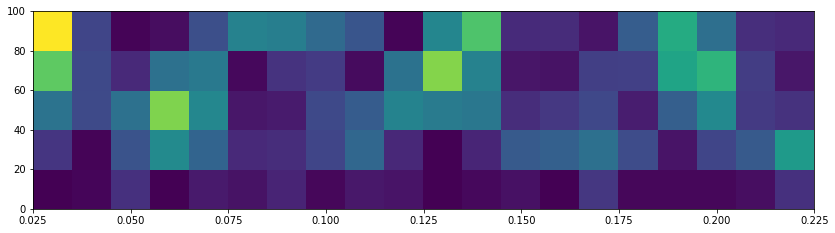

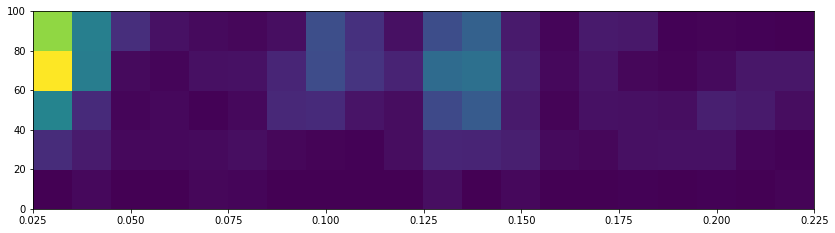

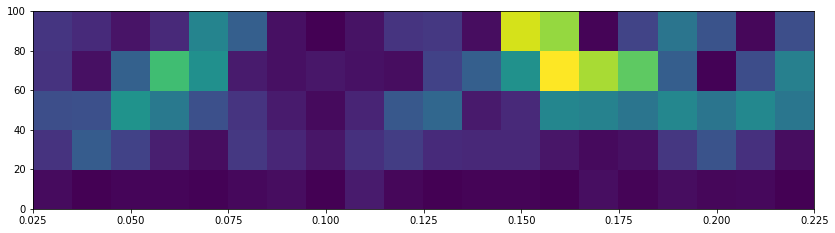

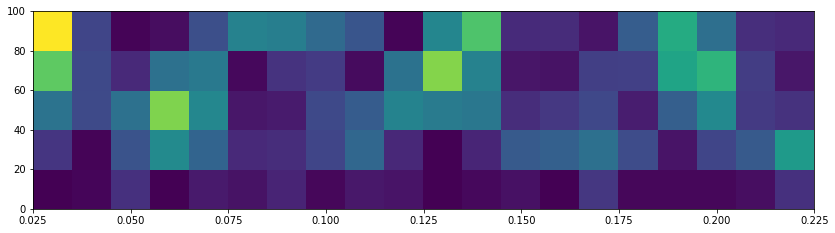

In [54]:
file_on = pd.read_csv('/Users/42robotics/jcruz-y-/neurosleeve/data/cleaned/alpha/jose_alpha_0_17.csv', sep=',')
nperseg=10
#increasing nperseg increases frequency resolution and decreases time res
noverlap=8
#increasing time resolution requires increasing overlap, 
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
print('spec_shape', spec.shape) #'spec', spec)
print('frequencies_shape', frequencies.shape)
print('times_shape', times.shape)
#spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_on['ch2'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_on['ch3'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)

spec_shape (6, 21)
frequencies_shape (6,)
times_shape (21,)
(6, 21)
(6, 21)
(6, 21)
(6, 21)


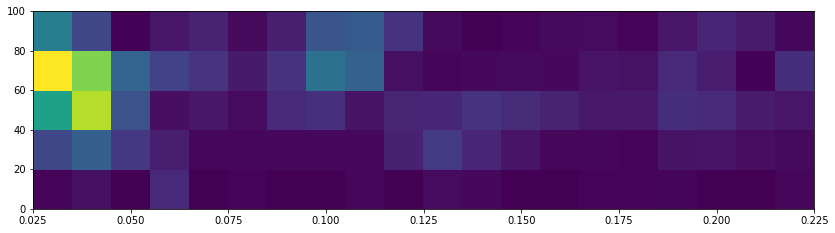

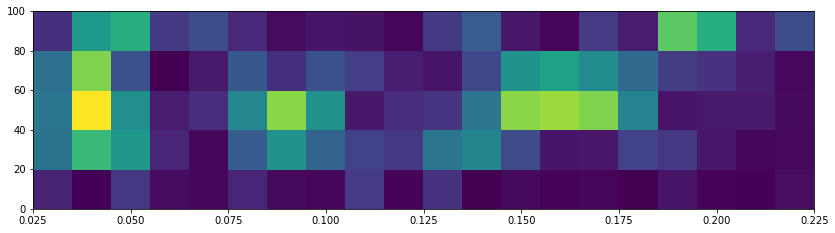

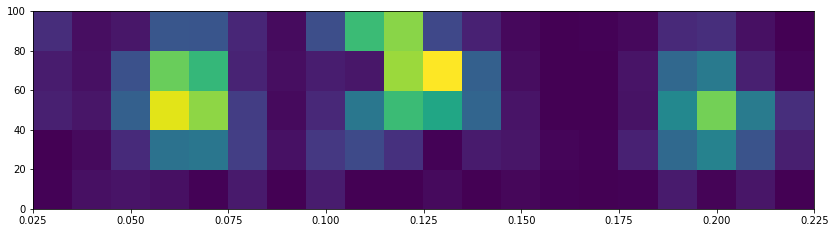

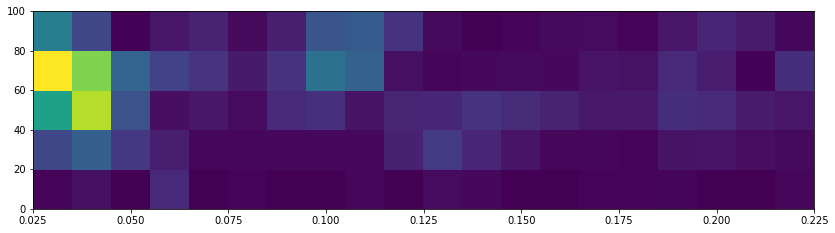

In [52]:
file_on = pd.read_csv('/Users/42robotics/jcruz-y-/neurosleeve/data/cleaned/alpha/jose_alpha_0_7.csv', sep=',')
nperseg=10
#increasing nperseg increases frequency resolution and decreases time res
noverlap=8
#increasing time resolution requires increasing overlap, 
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
print('spec_shape', spec.shape) #'spec', spec)
print('frequencies_shape', frequencies.shape)
print('times_shape', times.shape)
#spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_on['ch2'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_on['ch3'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_on['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)

spec_shape (6, 21)
frequencies_shape (6,)
times_shape (21,)
(6, 21)
(6, 21)
(6, 21)
(6, 21)


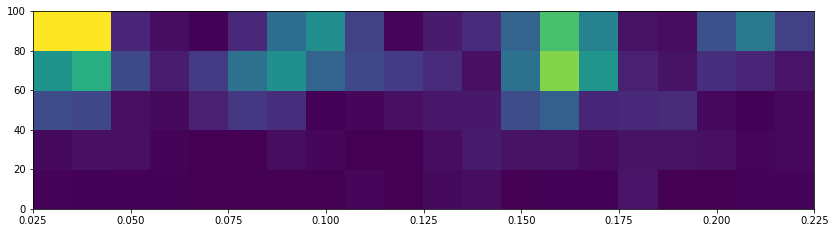

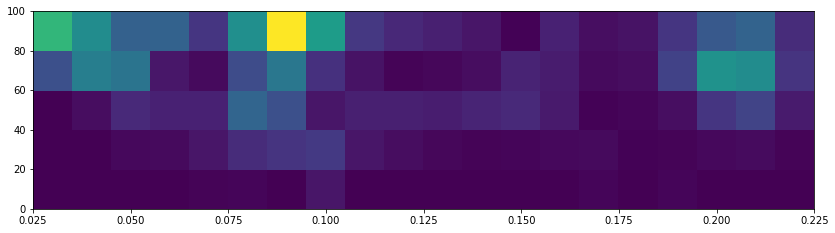

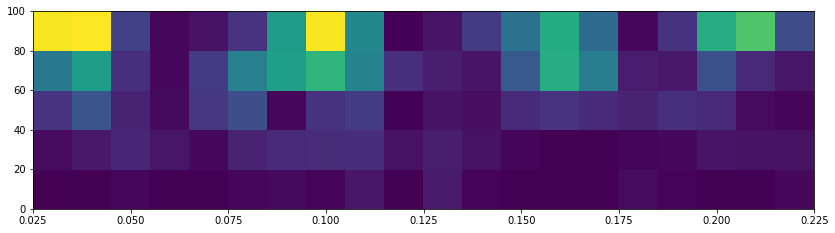

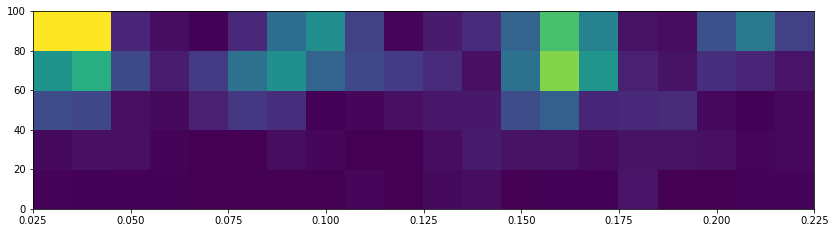

In [58]:
file_omega = pd.read_csv('/Users/42robotics/jcruz-y-/neurosleeve/data/cleaned/omega/jose_omega_0_23.csv', sep=',')
nperseg=10
#increasing nperseg increases frequency resolution and decreases time res
noverlap=8
#increasing time resolution requires increasing overlap, 
frequencies, times, spec = signal.spectrogram(x=file_omega['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
print('spec_shape', spec.shape) #'spec', spec)
print('frequencies_shape', frequencies.shape)
print('times_shape', times.shape)
#spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_omega['ch2'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_omega['ch3'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)
frequencies, times, spec = signal.spectrogram(x=file_omega['ch4'], fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
log_spec = np.log(spec)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1 = plt.pcolormesh(times, frequencies, spec)
ax1 = plt.show
print(spec.shape)

In [21]:
channels = ['ch1', 'ch2', 'ch3', 'ch4']
for i in range(4):
    frequencies, times, spec = signal.spectrogram(x=file_df[channels[i]], fs=200,
                                              nperseg=nperseg, noverlap=noverlap,
                                              window='hann')

# Model

In [54]:
path = '/Users/42robotics/jcruz-y-/neurosleeve/data/cleaned/'

In [55]:
lbl_folder_clean = next(os.walk(path))[1]
lbl_folder_clean

['right', 'go', 'left', 'stop', 'neutral', 'omega', 'alpha']

In [56]:
shape = (6, 21, 4)
flat_dim = shape[0]*shape[1]*shape[2]
nperseg = 10
noverlap = 8
reshape = (-1, shape[0], shape[1], shape[2])

### Load Data

In [57]:
###
cwd = os.getcwd()
path = '/Users/42robotics/jcruz-y-/neurosleeve/data/cleaned/'
lbl_folder_clean = next(os.walk(path))[1]
folders_path = 'data/cleaned'
channels = ['ch1', 'ch2', 'ch3', 'ch4']
###
shape = (6, 21, 4)
flat_dim = shape[0]*shape[1]*shape[2]
nperseg = 10
noverlap = 8
reshape = (-1, shape[0], shape[1], shape[2])
j = 0
i = 0
dir_num = 0
df_train_g = pd.DataFrame()
for folder in lbl_folder_clean:
    filepath = os.path.join(cwd, folders_path, folder)
    files = next(os.walk(filepath))[2]
    num_examples = len(files)
    x_shape = (num_examples, 6, 21, 4)
    x1_train = np.zeros(x_shape)
    j = 0
    for filename in files:
        file = pd.read_csv(os.path.join(cwd, folders_path, folder, filename), sep=',')
        img = np.zeros(shape)
        k = 0
        for i in range(4):
            frequencies, times, spec = signal.spectrogram(x=file[channels[i]], fs=200,
                                                          nperseg=nperseg, noverlap=noverlap,
                                                          window='hann')
            log_spec = np.log(spec)
            img[:,:,i] = spec
            i = i + 1
        x1_train[j,:,:,:] = img
        j = j + 1
    print(folder, x1_train.shape)
    flat = np.reshape(x1_train, (num_examples, flat_dim))
    df_train1 = pd.DataFrame(data=flat)
    vals = np.array([dir_num] * num_examples)
    dir_num = dir_num + 1
    df_train1['label'] = vals
    df_train_g = df_train_g.append(df_train1, ignore_index=True)

right (1080, 6, 21, 4)
go (1120, 6, 21, 4)
left (1120, 6, 21, 4)
stop (1160, 6, 21, 4)
neutral (1040, 6, 21, 4)
omega (1160, 6, 21, 4)
alpha (1160, 6, 21, 4)


In [58]:
df_train_g

0           1           2         3         4           5  \
0     0.493637    3.645880    0.013573  0.891724  0.006681    0.000192   
1     0.000563    0.386910    0.822366  2.678275  0.699197    1.392277   
2     0.014910    2.172128    1.923728  0.341645  0.002885    0.069078   
3     0.414334   24.420074    2.114315  0.079770  0.252364    1.006945   
4     0.028989    6.050705    0.017471  0.027961  0.092183    5.742997   
5     1.666493   79.064564    1.056672  2.073906  0.422044   18.382274   
6     0.029438    3.792729    4.815866  0.011692  0.575724   13.110524   
7     0.121553    1.956274    7.543930  8.164726  0.269975    3.534721   
8     0.219163    4.641047    0.505916  1.218394  0.017097    3.780366   
9     1.345698  300.072891    0.209877  1.291022  0.017254  339.704011   
10    0.134984   17.275333    0.494977  0.685295  0.033031    1.581473   
11    0.634540    4.978469    0.011985  0.000180  0.365017    0.794665   
12    0.123800    2.335854    0.443130  0.495853  0.001464   21.378388   
13    0.086336    1.550401    0.000169  0.029794  1.467801    0.541923   
14    0.209075    1.079184    0.011422  0.088809  1.846670    0.038401   
15    0.042389   11.800915    0.653491  1.696507  0.715498    0.783901   
16    5.297712    4.843291    1.006185  0.229259  1.763757    3.319021   
17    0.102448   21.406897    0.091964  0.470179  0.000306    0.156618   
18    2.360134   15.765564    0.002792  0.795365  0.031779   10.283963   
19    1.576301    0.208227    1.052592  6.978944  1.907099    2.320753   
20    0.039788    0.584643    0.002573  2.725582  0.004501    1.359354   
21    0.178693    0.315493    0.012555  0.320702  0.152036    0.092993   
22    0.286333    6.016793    0.118185  1.991457  0.079507    0.133833   
23    0.650144    6.715087    0.051154  0.636526  0.002188    0.002376   
24    0.113022    1.035389    0.085934  1.302839  0.629337    9.499580   
25    1.830830    1.051801    0.018743  0.165437  3.101283    0.320627   
26    0.087628    1.465730    0.399627  0.332466  0.134441    0.277693   
27    0.003837    6.874440    0.313334  0.428059  0.248706    0.341657   
28    0.010533    6.375561    0.001460  0.517140  0.671375    0.904689   
29    0.123710   18.064679    1.329112  1.823650  0.030446    6.126228   
...        ...         ...         ...       ...       ...         ...   
7810  0.164814    7.021039    0.841844  0.044783  1.837203   40.268530   
7811  0.195007    0.311513    0.001160  0.589989  3.298569   36.282103   
7812  0.323399    5.244409    6.199657  1.267111  0.009671    1.370772   
7813  0.048659    2.325403    0.249865  0.006448  4.166794    0.715919   
7814  4.982665    6.483050    1.676603  0.096101  0.097808    0.004207   
7815  1.547394   14.450321    1.194676  3.441292  0.022926    0.218365   
7816  0.413453    0.234516    3.415946  0.035601  0.202318    0.010911   
7817  0.873461    8.358329    0.650286  0.000023  1.340471    4.892476   
7818  0.020569    4.985486    1.287915  0.006793  1.449512    3.564696   
7819  0.072098    2.728183    0.042007  0.113801  0.342044    1.831712   
7820  0.506086    4.265262   13.971633  0.022990  4.870167    0.219773   
7821  0.000337    4.373486    7.005052  0.816893  5.088017  100.504469   
7822  2.946855   15.844156    4.363063  0.052243  0.588216    0.001823   
7823  4.530469    5.467173  196.286644  3.933086  1.741506   12.307570   
7824  0.324350    0.837234    2.563747  0.008731  2.999606    1.024948   
7825  0.112135    4.645029    7.354145  0.011088  2.029661    6.944906   
7826  0.000184    0.099342    0.346056  0.084856  0.972380   10.280435   
7827  0.245558   22.563395    0.824013  0.252572  0.181632    1.240308   
7828  0.024026    0.698735    1.169270  0.035666  0.174952    4.646927   
7829  0.350901    4.199031    6.991239  0.070294  0.506542    2.421739   
7830  0.031489    2.325216    0.157831  0.006568  3.541404    0.520129   
7831  2.353581    0.375975    2.154573  0.005505  0.159188    2.293564   
7832  0.011264   

In [59]:
def preprocess_features(x_train):
    #Normalization to greyscale, reduces the effect of illumination's differences
    x_train = x_train.replace(-np.inf, 0)
    x_train_norm = x_train.values.reshape(reshape)
    return x_train_norm

In [60]:
def preprocess_targets(y_train):
    y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes=7)
    return y_train_hot

In [61]:
int(df_train_g.shape[0]*.8)

6272

In [62]:
#df_train_rand = preprocess_data(df_train)
df_train_g = df_train_g.reindex(np.random.permutation(df_train_g.index))
X_train = preprocess_features(df_train_g.drop(labels = ['label'], axis = 1).head(int(df_train_g.shape[0]*.8)).copy())
X_test = preprocess_features(df_train_g.drop(labels = ['label'], axis = 1).tail(int(df_train_g.shape[0]*.2)).copy())
Y_train = preprocess_targets(df_train_g['label'].head(int(df_train_g.shape[0]*.8)).copy())
Y_test = preprocess_targets(df_train_g['label'].tail(int(df_train_g.shape[0]*.2)).copy())

In [63]:
df_train_g.head()

0          1         2         3          4          5  \
6486  20.386507  49.878784  0.027575  0.005962  33.367694   0.288119   
3291   3.046014   0.146649  0.007325  0.033030   0.048885   0.098148   
1652   0.616027   2.752232  4.827328  0.984977   0.221993   5.095256   
4333   2.674901   8.429619  2.717689  0.011509   2.226870  12.028635   
1627   0.986588   0.590322  0.306043  4.355193   0.436052  19.101312   

             6         7         8         9  ...        495        496  \
6486  0.032491  0.007680  0.059205  0.605638  ...   0.839463  20.724320   
3291  0.009836  0.073605  0.133506  2.101129  ...   0.035979   3.251167   
1652  2.748424  0.533677  0.424191  2.880976  ...  14.318265   0.005935   
4333  0.147024  1.368742  2.820620  0.013837  ...   5.699071  16.555435   
1627  0.004954  9.165323  1.781805  7.596027  ...   5.482150   0.074895   

             497       498       499        500        501        502  \
6486  161.216357  0.073005  0.440154  25.774782   2.931845   0.162826   
3291    0.000701  0.073763  0.058320   3.852229   0.077275   0.078321   
1652    1.500962  0.484812  4.305792   0.023978   0.029613   4.881246   
4333    6.926913  0.838440  8.771593  39.723979  21.185215  23.049188   
1627    0.015044  3.899485  1.436989   0.068979   0.077126   2.721820   

           503  label  
6486  0.872642      5  
3291  0.022965      2  
1652  3.258410      1  
4333  0.255776      3  
1627  0.007995      1  

[5 rows x 505 columns]

In [64]:
X_train.shape

(6272, 6, 21, 4)

In [76]:
def create_model(input_shape):
    inputlayer = Input(shape=input_shape)
    nclass = 7
    
    norm_input = BatchNormalization()(inputlayer)
    model = Conv2D(32, kernel_size=2, padding='same', activation='relu')(norm_input)
    model = Conv2D(32, kernel_size=2, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = Dropout(rate=0.2)(model)
    model = Conv2D(64, kernel_size=3, padding='same', activation='relu')(model)
    model = Conv2D(64, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(2, 2))(model)
    model = Dropout(rate=0.2)(model)
    model = Conv2D(128, kernel_size=3, padding='same', activation='relu')(model)
    model = Conv2D(128, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling2D(pool_size=(1, 1))(model)
    model = Dropout(rate=0.2)(model)
    model = Flatten()(model) 

    dense_1 = BatchNormalization()(Dense(128, activation='relu')(model))
    dense_1 = BatchNormalization()(Dense(128, activation='relu')(dense_1))
    dense_1 = Dense(nclass, activation='softmax')(dense_1)

    model = Model(inputs=inputlayer, outputs=dense_1)
    
    return model

In [77]:
model3 = create_model(shape)

In [78]:
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 6, 21, 4)          0         
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 6, 21, 4)          16        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 21, 32)         544       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 21, 32)         4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 10, 32)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 10, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 10, 64)         18496     
__________

In [79]:
optimizer = tf.keras.optimizers.Adam(lr = 0.0001,
                                   beta_1 = 0.9,
                                   beta_2 = 0.999,
                                   epsilon = 1e-08)

In [80]:
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
#model3.compile(optimizer = optimizer, loss = 'category_crossentropy', metrics = ['accuracy'])

In [82]:
tensorboard = TensorBoard(log_dir='./logs/{}'.format(time()))

In [83]:
Y_train.shape

(6272, 7)

In [90]:
history = model3.fit(X_train,
                   Y_train,
                   batch_size=40,
                   epochs=20,
                   validation_split=0.1,
                   #validation_data=(X_val, Y_val),
                   callbacks=[tensorboard])

Train on 5644 samples, validate on 628 samples
Epoch 1/20
5644/5644 [==============================] - 4s 796us/sample - loss: 0.2416 - acc: 0.9093 - val_loss: 0.2349 - val_acc: 0.9140
Epoch 2/20
5644/5644 [==============================] - 4s 708us/sample - loss: 0.2277 - acc: 0.9125 - val_loss: 0.2721 - val_acc: 0.9029
Epoch 3/20
5644/5644 [==============================] - 4s 728us/sample - loss: 0.2205 - acc: 0.9157 - val_loss: 0.2728 - val_acc: 0.8949
Epoch 4/20
5644/5644 [==============================] - 4s 734us/sample - loss: 0.2219 - acc: 0.9116 - val_loss: 0.2912 - val_acc: 0.8949
Epoch 5/20
5644/5644 [==============================] - 5s 801us/sample - loss: 0.2108 - acc: 0.9160 - val_loss: 0.2614 - val_acc: 0.9092
Epoch 6/20
5644/5644 [==============================] - 5s 825us/sample - loss: 0.2460 - acc: 0.9064 - val_loss: 0.2561 - val_acc: 0.9076
Epoch 7/20
5644/5644 [==============================] - 4s 777us/sample - loss: 0.2236 - acc: 0.9111 - val_loss: 0.2555 - val

In [91]:
preds = model3.predict(X_test)

In [92]:
preds[0]

array([1.5306866e-03, 5.6170285e-07, 9.9102271e-01, 3.6984850e-06,
       1.1571619e-04, 7.2272187e-03, 9.9570527e-05], dtype=float32)

In [93]:
evaluate = model3.evaluate(X_test, Y_test)

1568/1568 [==============================] - 0s 183us/sample - loss: 0.3155 - acc: 0.8903


In [94]:
model3.save('model_2.h5')

# Read from sliced and cleaned data to create dataframe with spectograms

In [ ]:

###
path = '/Users/42robotics/jcruz-y-/neurosleeve/data/cleaned/'
lbl_folder_clean = next(os.walk(path))[1]
folders_path = 'data/cleaned'
channels = ['ch1', 'ch2', 'ch3', 'ch4']
###
shape = (6, 21, 4)
flat_dim = shape[0]*shape[1]*shape[2]
nperseg = 10
noverlap = 8
reshape = (-1, shape[0], shape[1], shape[2])
j = 0
i = 0
dir_num = 0
df_train_g = pd.DataFrame()
for folder in lbl_folder_clean:
    filepath = os.path.join(cwd, folders_path, folder)
    files = next(os.walk(filepath))[2]
    num_examples = len(files)
    x_shape = (num_examples, 6, 21, 4)
    x1_train = np.zeros(x_shape)
    j = 0
    for filename in files:
        file = pd.read_csv(os.path.join(cwd, folders_path, folder, filename), sep=',')
        img = np.zeros(shape)
        k = 0
        for i in range(4):
            frequencies, times, spec = signal.spectrogram(x=file[channels[i]], fs=200,
                                                          nperseg=nperseg, noverlap=noverlap,
                                                          window='hann')
            log_spec = np.log(spec)
            img[:,:,i] = spec
            i = i + 1
        x1_train[j,:,:,:] = img
        j = j + 1
    print(folder, x1_train.shape)
    flat = np.reshape(x1_train, (num_examples, flat_dim))
    df_train1 = pd.DataFrame(data=flat)
    vals = np.array([dir_num] * num_examples)
    dir_num = dir_num + 1
    df_train1['label'] = vals
    df_train_g = df_train_g.append(df_train1, ignore_index=True)

# Ideally read from sliced 250 ms data

In [34]:
CH_DATA = {'ch1': [79.18, 61.22, 72.2, 46.85, 73.5, 66.09, 103.34, 44.84, 52.33, 50.3, 84.68, 36.03, 57.21, 58.51, 65.88, 54.18, 53.43, 35.59, 60.73, 28.82, 31.53, 59.93, 38.18, 42.03, 53.89, 34.74, 21.34, 34.34, 55.36, 25.74, 30.42, 32.29, 37.1, 36.8, 39.09, 35.01, 86.75, 7.62, 40.91, 40.91, 22.92, 46.04, 44.48, 33.26, 38.22, 36.03, 42.41, 35.59, 52.15, 8.96], 'ch2': [182.17, -109.14, -43.32, -173.86, 16.0, -51.87, -97.45, 46.95, 36.61, -36.94, 181.61, -74.12, -124.19, 34.04, -43.34, -53.7, 341.04, -89.89, 142.34, -119.22, 10.55, -92.87, -42.12, 113.26, 132.96, 60.23, -13.2, 41.19, 182.79, -162.71, 36.82, 80.87, 31.04, 3.89, 117.09, 98.37, 69.02, 26.59, 114.53, 213.16, -173.33, 131.0, -92.95, 185.41, 173.5, 108.36, 56.01, 69.06, 161.8, 63.59], 'ch3': [28.17, 24.33, 13.11, 17.63, 20.2, 14.83, 6.83, 21.29, 12.18, 5.33, 12.35, 1.33, 6.71, 9.77, 3.63, 0.36, 3.62, 6.19, -0.94, 8.44, 3.86, -7.27, -3.23, 0.33, -6.2, -2.83, -4.44, -3.06, -16.64, -9.07, -8.3, -16.79, -16.71, -17.58, -17.37, -18.64, -22.21, -10.21, -12.14, -15.22, -10.85, -4.38, -9.56, 0.4, 4.63, -2.84, -4.08, 4.99, 10.11, 0.68], 'ch4': [39.18, 51.62, 41.12, 37.64, 45.33, 32.36, 25.66, 57.35, 52.73, 38.17, 50.72, 41.91, 40.53, 44.37, 43.14, 35.33, 48.26, 47.85, 28.03, 42.15, 46.26, 30.84, 34.5, 46.14, 37.18, 46.71, 44.26, 46.69, 27.05, 61.57, 50.6, 48.7, 46.84, 35.41, 53.01, 51.9, 42.19, 57.07, 46.3, 41.52, 43.42, 44.31, 40.47, 56.4, 61.16, 43.51, 42.27, 44.5, 62.13, 34.5]}

In [35]:
CH_DATA.values

<function dict.values>

In [36]:
np.array(list(CH_DATA.items()))

ValueError: setting an array element with a sequence

In [37]:
CH_DATA.items()

dict_items([('ch1', [79.18, 61.22, 72.2, 46.85, 73.5, 66.09, 103.34, 44.84, 52.33, 50.3, 84.68, 36.03, 57.21, 58.51, 65.88, 54.18, 53.43, 35.59, 60.73, 28.82, 31.53, 59.93, 38.18, 42.03, 53.89, 34.74, 21.34, 34.34, 55.36, 25.74, 30.42, 32.29, 37.1, 36.8, 39.09, 35.01, 86.75, 7.62, 40.91, 40.91, 22.92, 46.04, 44.48, 33.26, 38.22, 36.03, 42.41, 35.59, 52.15, 8.96]), ('ch2', [182.17, -109.14, -43.32, -173.86, 16.0, -51.87, -97.45, 46.95, 36.61, -36.94, 181.61, -74.12, -124.19, 34.04, -43.34, -53.7, 341.04, -89.89, 142.34, -119.22, 10.55, -92.87, -42.12, 113.26, 132.96, 60.23, -13.2, 41.19, 182.79, -162.71, 36.82, 80.87, 31.04, 3.89, 117.09, 98.37, 69.02, 26.59, 114.53, 213.16, -173.33, 131.0, -92.95, 185.41, 173.5, 108.36, 56.01, 69.06, 161.8, 63.59]), ('ch3', [28.17, 24.33, 13.11, 17.63, 20.2, 14.83, 6.83, 21.29, 12.18, 5.33, 12.35, 1.33, 6.71, 9.77, 3.63, 0.36, 3.62, 6.19, -0.94, 8.44, 3.86, -7.27, -3.23, 0.33, -6.2, -2.83, -4.44, -3.06, -16.64, -9.07, -8.3, -16.79, -16.71, -17.58, -17.

In [38]:
df = pd.DataFrame(data=CH_DATA)
print(df.shape)
df.head()

(50, 4)


ch1     ch2    ch3    ch4
0  79.18  182.17  28.17  39.18
1  61.22 -109.14  24.33  51.62
2  72.20  -43.32  13.11  41.12
3  46.85 -173.86  17.63  37.64
4  73.50   16.00  20.20  45.33

In [39]:
x_train_norm = df.values.reshape(reshape)

ValueError: cannot reshape array of size 200 into shape (6,21,4)

In [42]:
import scipy as sp
def preprocess(x_train):
    #Normalization to greyscale, reduces the effect of illumination's differences
    img = np.zeros((1, 6, 21, 4))
    CHANNELS = ['ch1', 'ch2', 'ch3', 'ch4']
    for i in range(4):
        frequencies, times, spec = sp.signal.spectrogram(x=x_train[CHANNELS[i]],
        fs=200, nperseg=nperseg, noverlap=noverlap, window='hann')
        img[0,:,:,i] = spec
    return img

In [43]:
x_data = preprocess(df)
x_data.shape

(1, 6, 21, 4)

In [44]:
pred = [0.5, 0.3]

In [45]:
max(pred)

0.5